# Convolutional Neural Networks (CNNs / ConvNets)

Reference:
<br>
https://sci2lab.github.io/ml_tutorial/cnn/
<br>
https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
<br>
https://machinelearningmastery.com/deep-learning-with-python/

Every object must be flattened and then represented with a vector, that will be the input vector for training.
<br> Every class in the dataset must be represented with its one-hot label vector. A one-hot label vector is a vector with size equal to the number of different classes in the dataset. 

## Keyword
<br> element-wise matrix multiplication

# Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt

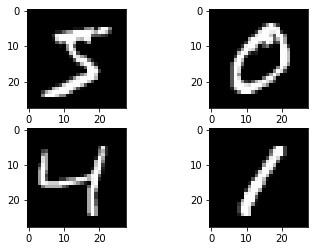

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#the data set has been split already 70k:10k

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [5]:
X_train.shape 
#X_train is a 3D array with shape[0] as the number of images
#before flatteing, it was (60000,28,28)

(60000, 784)

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#y_train is an array of 0 to 9
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
num_classes

10

In [11]:
y_train.shape
#now we have 10 dummy columns to denote 0-9

(60000, 10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	#the first ladyer will take input_dim as the dimension of input
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

	
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# build the model
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### here is an example of how softmax() works:
<br># define data
<br>data = [1, 3, 2]
<br># calculate softmax
<br>result = softmax(data)
<br># report the probabilities
<br>print(result)
<br># report the sum of the probabilities
<br>print(sum(result))
<br>----> [0.09003057 0.66524096 0.24472847]
<br>----> 0.9999999999999997

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

It is very interesting on how the model accruacy is calcualted. Accruacy should be calcualted with (y_true;y_pred) when y_pred denote the class with the highest probablility. Refer to this thread:
<br>
https://towardsdatascience.com/softmax-regression-in-python-multi-class-classification-3cb560d90cb2
<br>
https://stackoverflow.com/questions/60387266/how-do-we-calculate-the-accuracy-of-a-multi-class-classifier-using-neural-network
<br>
https://stats.stackexchange.com/questions/517930/metrics-for-multiclass-classification-model-accuracy

In [35]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 2s - loss: 0.2805 - accuracy: 0.9214 - val_loss: 0.1372 - val_accuracy: 0.9589 - 2s/epoch - 6ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1095 - accuracy: 0.9676 - val_loss: 0.0928 - val_accuracy: 0.9720 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0710 - accuracy: 0.9795 - val_loss: 0.0849 - val_accuracy: 0.9728 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0497 - accuracy: 0.9855 - val_loss: 0.0658 - val_accuracy: 0.9797 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0364 - accuracy: 0.9899 - val_loss: 0.0645 - val_accuracy: 0.9788 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0270 - accuracy: 0.9926 - val_loss: 0.0679 - val_accuracy: 0.9786 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0196 - accuracy: 0.9949 - val_loss: 0.0568 - val_accuracy: 0.9824 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0592 - val_accuracy: 0.9820 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.
<br>
This means that batch_size=200 (go through 200 images before updating the model)
<br>
Epoch = 10 means go through the entire dataset 10 times



In [37]:
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.60%


## CNN

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
X_train[0].shape

(28, 28, 1)

In [6]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Below summarizes the network architecture.

<br> The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].

<br> Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.

<br> The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

<br> Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers. Read more here: https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480

<br> Next a fully connected layer with 128 neurons and rectifier activation function.

<br> Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [9]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
		#there are 32 activation maps produced by using 5x5 features on the input
	model.add(MaxPooling2D(pool_size=(2, 2))) #there are 
	model.add(Dropout(0.2))
	model.add(Flatten())
		#here, the flattener will acutallt flatten the previous layers into 1 array (althought befor they were several maps)
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [10]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/2
300/300 - 9s - loss: 0.2417 - accuracy: 0.9309 - val_loss: 0.0750 - val_accuracy: 0.9767 - 9s/epoch - 29ms/step
Epoch 2/2
300/300 - 9s - loss: 0.0733 - accuracy: 0.9778 - val_loss: 0.0507 - val_accuracy: 0.9830 - 9s/epoch - 29ms/step
CNN Error: 1.70%


In [11]:
predict_result = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [65]:
import seaborn as sns

In [64]:
predict_result[0]

array([2.4077546e-10, 1.4370258e-10, 6.1811811e-08, 2.1913081e-07,
       8.4582695e-11, 2.0672311e-09, 8.2988598e-16, 9.9999928e-01,
       4.9324655e-09, 3.5621571e-07], dtype=float32)

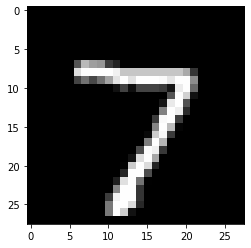

In [12]:
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))


# Appendix

- What is Verbose?

In [60]:
number = 1234.5678
print('This is a formatted number %.2f%%'%number)

This is a formatted number 1234.57%


In [ ]:
def basline_model():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_corssentropy', optimizer='adam', metrics=['accurary'])
    return model

#build model
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      